In [7]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
import matplotlib.pyplot as plt

# 📥 Load Dataset (Top 10,000 words)
vocab_size = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

In [8]:
print(f"Train samples: {len(x_train)}, Test samples: {len(x_test)}")

Train samples: 25000, Test samples: 25000


In [10]:

# 📏 Preprocess - Pad Sequences
maxlen = 200
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [11]:
# 🧠 Build the Model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=32, input_length=maxlen),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])


In [12]:
# ⚙️ Compile Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
# 🎓 Train the Model
history = model.fit(x_train, y_train, epochs=5, batch_size=512, validation_split=0.2)

Epoch 1/5
40/40 [==============================] - 2s 24ms/step - loss: 0.6739 - accuracy: 0.5835 - val_loss: 0.5717 - val_accuracy: 0.7552
Epoch 2/5
40/40 [==============================] - 1s 20ms/step - loss: 0.3538 - accuracy: 0.8603 - val_loss: 0.3150 - val_accuracy: 0.8628
Epoch 3/5
40/40 [==============================] - 1s 21ms/step - loss: 0.1383 - accuracy: 0.9530 - val_loss: 0.3481 - val_accuracy: 0.8590
Epoch 4/5
40/40 [==============================] - 1s 22ms/step - loss: 0.0498 - accuracy: 0.9901 - val_loss: 0.3870 - val_accuracy: 0.8628
Epoch 5/5
40/40 [==============================] - 1s 21ms/step - loss: 0.0149 - accuracy: 0.9983 - val_loss: 0.4120 - val_accuracy: 0.8654


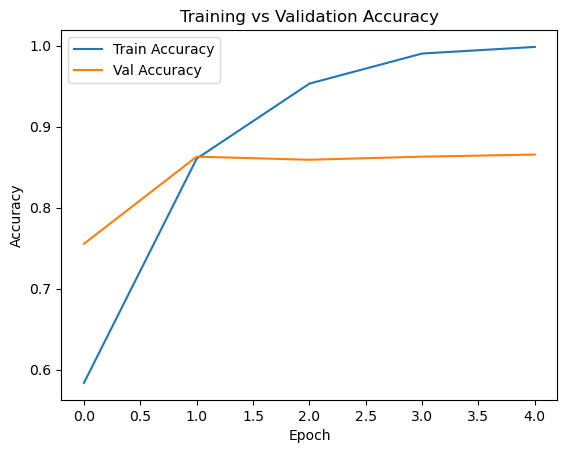

In [14]:
# 📈 Plot Training and Validation Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

In [15]:
# 📊 Evaluate on Test Data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\n✅ Test Accuracy: {test_acc*100:.2f}%")

782/782 [==============================] - 1s 1ms/step - loss: 0.4229 - accuracy: 0.8587

✅ Test Accuracy: 85.87%


In [16]:
# 💬 Custom Review Prediction
word_index = imdb.get_word_index()
reverse_word_index = {value: key for key, value in word_index.items()}

def encode_review(text):
    words = text.lower().split()
    encoded = [word_index.get(word, 2) for word in words]  # 2 for unknown
    return pad_sequences([encoded], maxlen=maxlen)

In [18]:
# Try your own review here
sample_review = "This movie was absolutely fantastic and full of emotions 👨🏽‍💻"
encoded_review = encode_review(sample_review)
prediction = model.predict(encoded_review)[0][0]

print(f"\nReview: \"{sample_review}\"")
print("🔮 Prediction:", "Positive 😊" if prediction > 0.5 else "Negative 😞")

1/1 [==============================] - 0s 19ms/step

Review: "This movie was absolutely fantastic and full of emotions 👨🏽‍💻"
🔮 Prediction: Negative 😞
